In [232]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,recall_score,precision_score
import seaborn as sns
import matplotlib.pyplot as plt

In [210]:
data = pd.read_csv('BikeBuyers.csv')

In [211]:
data.head()

,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,NumberCarsOwned,CommuteDistance,Age,BikeBuyer
0,90000,2,0,Bachelors,0,1-2 Miles,49,1
1,60000,3,3,Bachelors,1,0-1 Miles,50,1
2,60000,3,3,Bachelors,1,2-5 Miles,50,1
3,70000,0,0,Bachelors,1,5-10 Miles,47,1
4,80000,5,5,Bachelors,4,1-2 Miles,47,1


In [212]:
data.columns

Index(['YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome',
       'EnglishEducation', 'NumberCarsOwned', 'CommuteDistance', 'Age',
       'BikeBuyer'],
      dtype='object')

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   YearlyIncome          18484 non-null  int64 
 1   TotalChildren         18484 non-null  int64 
 2   NumberChildrenAtHome  18484 non-null  int64 
 3   EnglishEducation      18484 non-null  object
 4   NumberCarsOwned       18484 non-null  int64 
 5   CommuteDistance       18484 non-null  object
 6   Age                   18484 non-null  int64 
 7   BikeBuyer             18484 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.1+ MB


In [214]:
data.isna().sum()

YearlyIncome            0
TotalChildren           0
NumberChildrenAtHome    0
EnglishEducation        0
NumberCarsOwned         0
CommuteDistance         0
Age                     0
BikeBuyer               0
dtype: int64

In [215]:
data.shape

(18484, 8)

In [216]:
modify = (data['YearlyIncome'] > 140000)
print(modify)

0        False
1        False
2        False
3        False
4        False
         ...  
18479    False
18480    False
18481    False
18482    False
18483    False
Name: YearlyIncome, Length: 18484, dtype: bool


In [217]:
#transform the data
data = pd.get_dummies(data)


In [218]:
data.shape

(18484, 16)

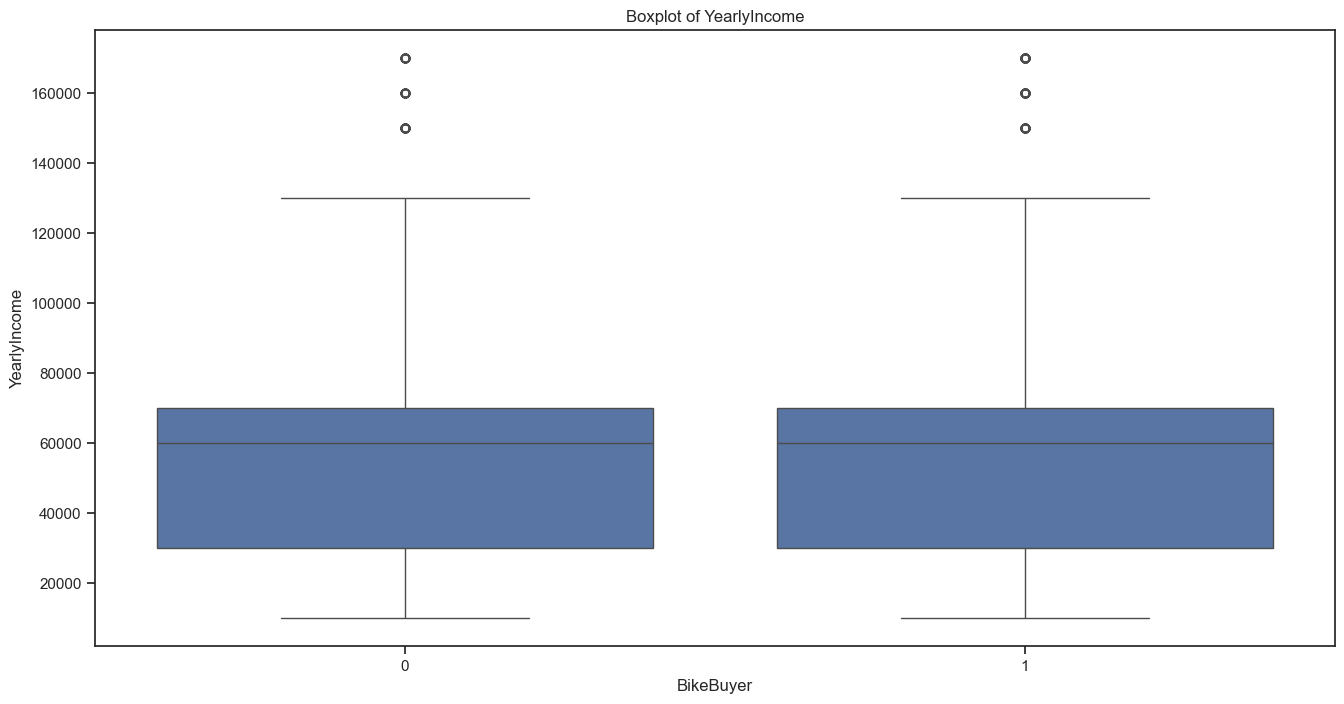

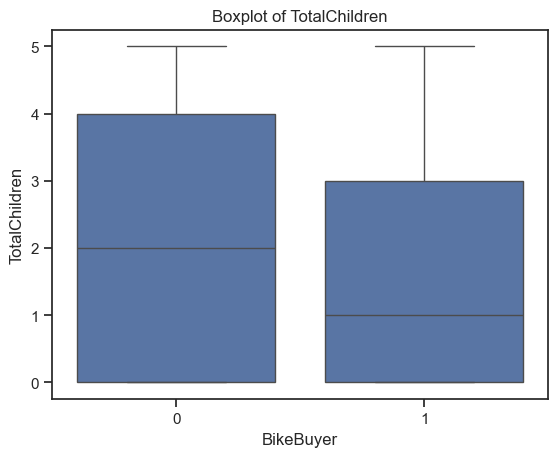

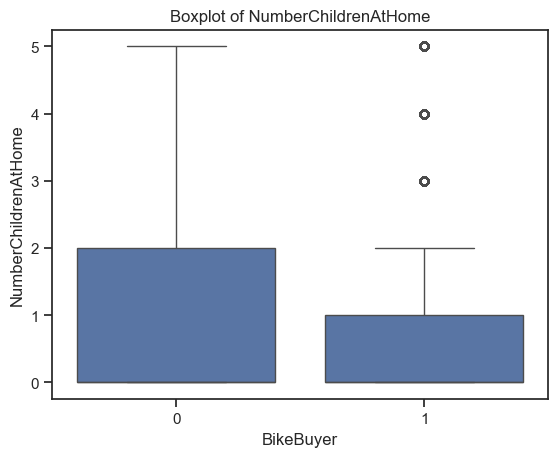

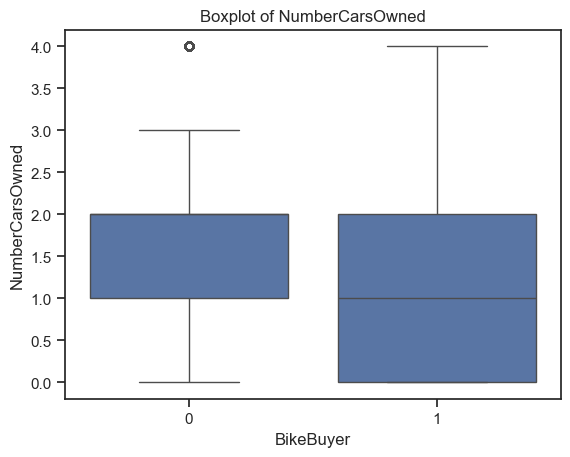

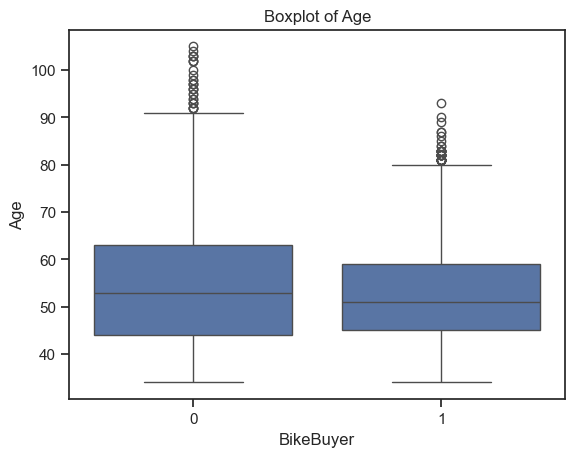

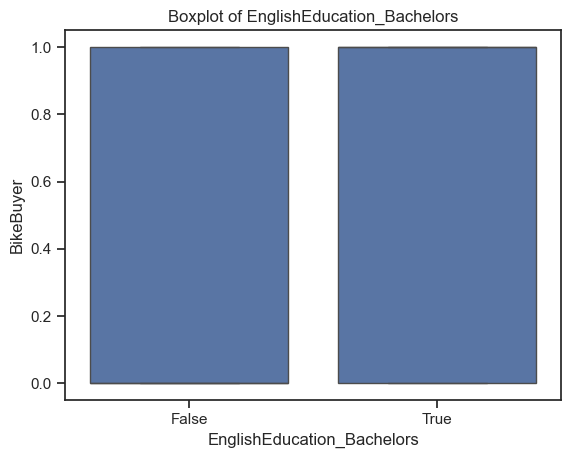

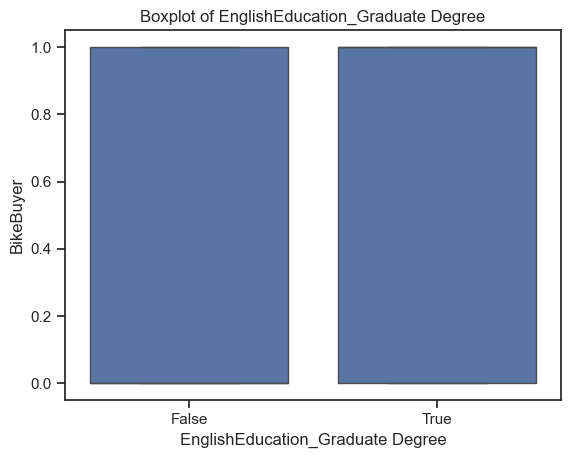

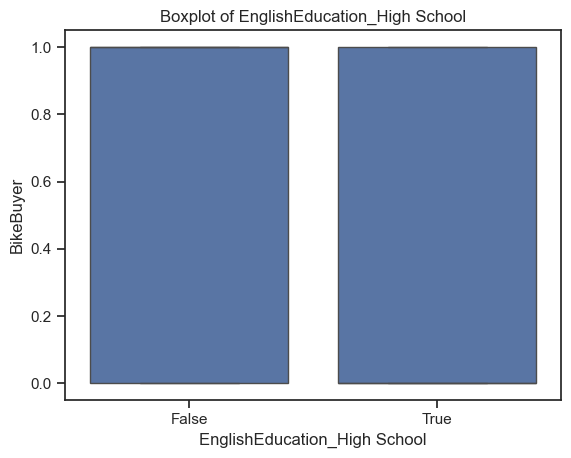

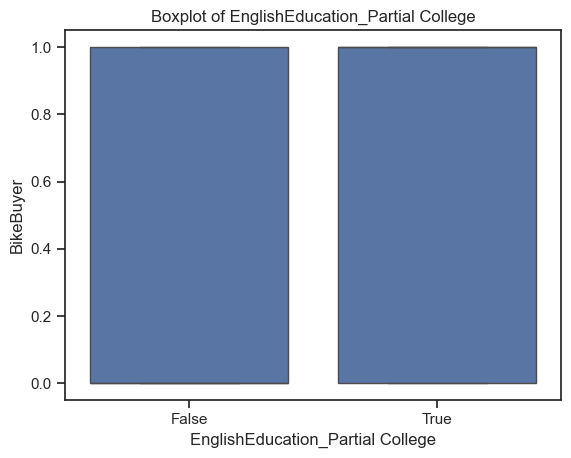

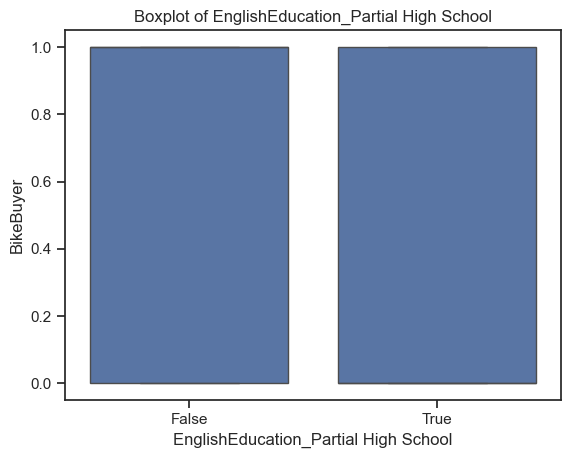

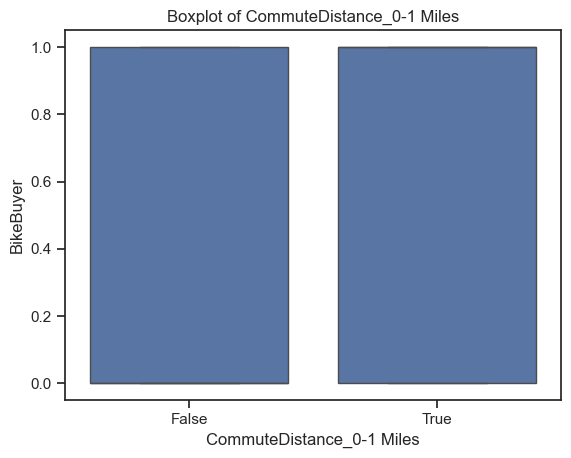

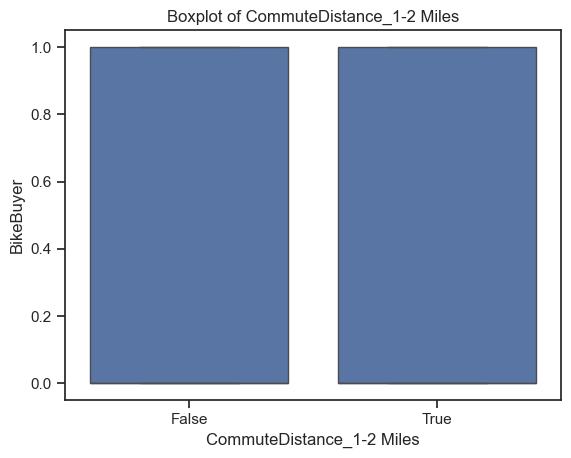

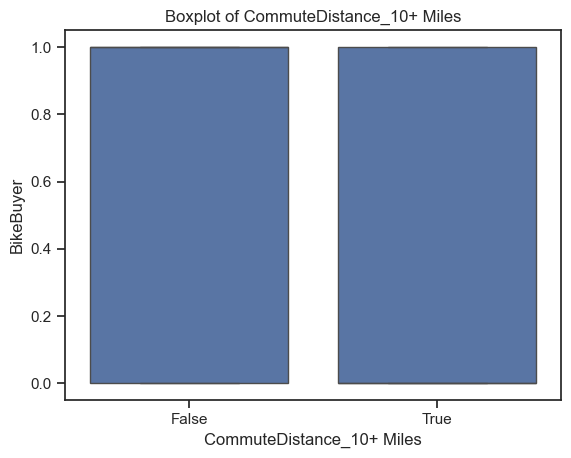

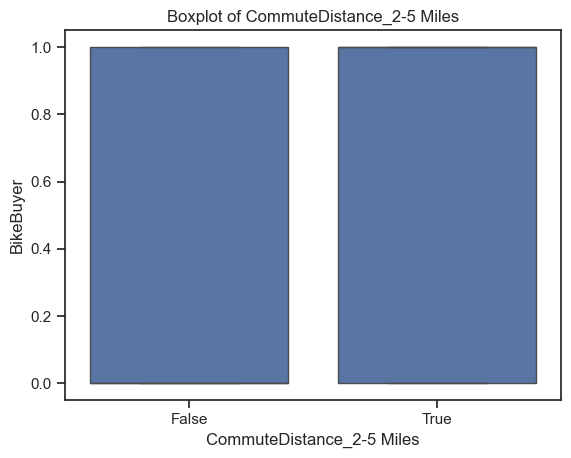

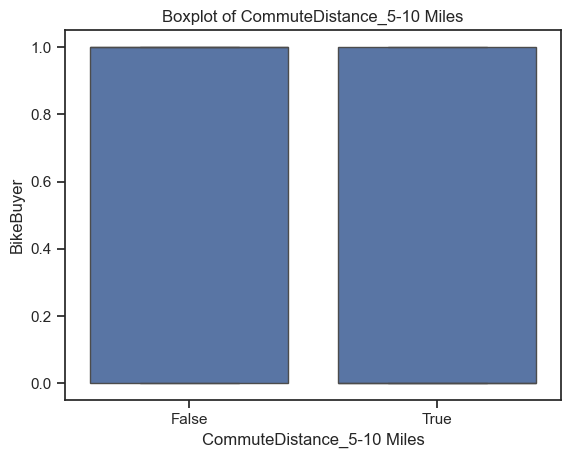

In [219]:
plt.figure(figsize=(16, 8))  # Adjust the figure size as needed

# Plot the boxplots for numeric features
numeric_features = ['YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned', 'Age']
for feature in numeric_features:
    sns.boxplot(x='BikeBuyer', y=feature, data=data)
    plt.title(f'Boxplot of {feature}')
    plt.show()

# Plot the boxplots for categorical features
categorical_features = [
    'EnglishEducation_Bachelors',
    'EnglishEducation_Graduate Degree',
    'EnglishEducation_High School',
    'EnglishEducation_Partial College',
    'EnglishEducation_Partial High School',
    'CommuteDistance_0-1 Miles',
    'CommuteDistance_1-2 Miles',
    'CommuteDistance_10+ Miles',
    'CommuteDistance_2-5 Miles',
    'CommuteDistance_5-10 Miles'
]

for feature in categorical_features:
    sns.boxplot(x=feature, y='BikeBuyer', data=data)
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [220]:
data


,YearlyIncome,TotalChildren,NumberChildrenAtHome,NumberCarsOwned,Age,BikeBuyer,EnglishEducation_Bachelors,EnglishEducation_Graduate Degree,EnglishEducation_High School,EnglishEducation_Partial College,EnglishEducation_Partial High School,CommuteDistance_0-1 Miles,CommuteDistance_1-2 Miles,CommuteDistance_10+ Miles,CommuteDistance_2-5 Miles,CommuteDistance_5-10 Miles
0,90000,2,0,0,49,1,True,False,False,False,False,False,True,False,False,False
1,60000,3,3,1,50,1,True,False,False,False,False,True,False,False,False,False
2,60000,3,3,1,50,1,True,False,False,False,False,False,False,False,True,False
3,70000,0,0,1,47,1,True,False,False,False,False,False,False,False,False,True
4,80000,5,5,4,47,1,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,30000,1,0,0,57,1,False,True,False,False,False,True,False,False,False,False
18480,30000,3,0,0,54,1,False,True,False,False,False,True,False,False,False,False
18481,30000,3,0,0,55,1,False,True,False,False,False,True,False,False,False,False
18482,30000,3,0,0,56,1,True,False,False,False,False,True,False,False,False,False


In [221]:
x = data.drop('BikeBuyer',axis = 1)
y = data['BikeBuyer']

In [222]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

In [223]:
model = KNeighborsClassifier(leaf_size=20)
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [224]:
model.fit(xtrain,ytrain)

KNeighborsClassifier(leaf_size=20)

In [225]:
model.score(xtest,ytest)

0.7663180670753696

In [229]:
preds = model.predict(xtest)
true = ytest

In [234]:
precision_score(preds,true)

0.7791963950431844

In [236]:
f1_score(true,preds)

0.7620271759089241

In [237]:
recall_score(true,preds)

0.7791963950431844